In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as sc
from matplotlib import animation
import tensorflow as tf
import pandas as pd
import math

## 3.1.1 Maximize likelihood least square 
fitting curve using Gaussian Basis function,
the equation is 3.35

In [2]:
def GaussianBasis(x,u,d=1,s=1,t=1):
    result=np.array([])
    if t!=1:
        for i,j in zip(x,u):
            result=np.append(result,sc.norm.pdf((i-j)/s))
    else:
        for j in u:
            result=np.append(result,sc.norm.pdf((x-j)/s))
    result=result.reshape(d,1)
   
    return result
def mixtureGaussian(x,w,m,sd=1):
    result=0
    curve=0
    for i,j in zip(w,m):
        result=result+sc.norm.pdf((x-j)/sd)*i
    result=result*10   
    return result  

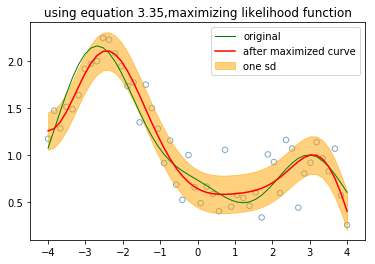

In [3]:
X=np.linspace(-4,4,50)
noise_sd=0.2
mixWeight=[0.2,0.25,0.4,0.15]
mixMean=[-2,3,-3,0]
u=np.linspace(-4,5,8)
 
C=mixtureGaussian(X,mixWeight,mixMean)

T=C+np.random.normal(scale=noise_sd,size=C.size)
T=T.reshape(T.size,1)
plt.figure()
plt.title('using equation 3.35,maximizing likelihood function')
ax=plt.gca()
plt.plot(X,C,linewidth=1,color='green',label='original')
#T=T+np.random.normal(scale=1,size=T.size)

plt.scatter(X,T,color='none',alpha=0.7,s=30,edgecolor="steelblue")
#print(GaussianBasis(X[0],u).size)
Basis=np.array(np.concatenate((np.array([[1]]),GaussianBasis(X[0],u,d=u.size).reshape(u.size,1)),axis=0)).T
for x in X[1:]:
    Basis=np.concatenate((Basis,np.array(np.concatenate((np.array([[1]]),GaussianBasis(x,u,d=u.size).reshape(u.size,1)),axis=0)).T),axis=0)
weights=np.matmul(np.matmul(np.linalg.inv(np.matmul(Basis.T,Basis)),Basis.T),T)
predict=np.matmul(Basis,weights)
ax.plot(X,predict,color='red',label='after maximized curve')
#s=np.linspace(-3,3,5)
ax.fill_between(X,pd.DataFrame((predict+noise_sd))[:][0].values,pd.DataFrame((predict-noise_sd))[:][0].values, color="orange", alpha=0.5, label="one sd")

#ax.plot(X,predict+noise_sd,predict-noise_sd)
ax.legend()

## 3.1.4 Regularized least square with coeffiecient 'alpha'

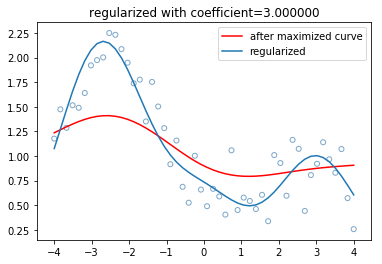

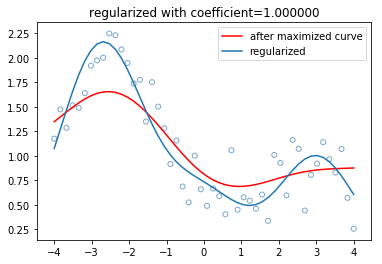

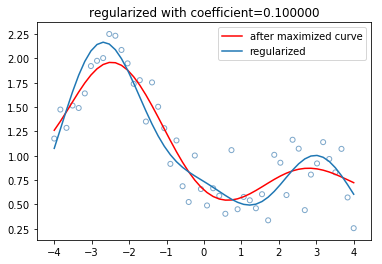

In [4]:
alpha=3
plt.figure()
weight2=np.matmul(np.matmul(np.linalg.inv(np.matmul(Basis.T,Basis)+np.identity(Basis.shape[1])*alpha),Basis.T),T)
predict=np.matmul(Basis,weight2)
plt.plot(X,predict,color='red',label='after maximized curve')
plt.scatter(X,T,color='none',alpha=0.7,s=25,edgecolor="steelblue")
plt.plot(X,C,label='regularized')
plt.title('regularized with coefficient=%f'%alpha)
plt.legend()
######
alpha=1
plt.figure()
weight2=np.matmul(np.matmul(np.linalg.inv(np.matmul(Basis.T,Basis)+np.identity(Basis.shape[1])*alpha),Basis.T),T)
predict=np.matmul(Basis,weight2)
plt.plot(X,predict,color='red',label='after maximized curve')
plt.scatter(X,T,color='none',alpha=0.7,s=25,edgecolor="steelblue")
plt.plot(X,C,label='regularized')
plt.title('regularized with coefficient=%f'%alpha)
plt.legend()
######
alpha=0.1
plt.figure()
weight2=np.matmul(np.matmul(np.linalg.inv(np.matmul(Basis.T,Basis)+np.identity(Basis.shape[1])*alpha),Basis.T),T)
predict=np.matmul(Basis,weight2)
plt.plot(X,predict,color='red',label='after maximized curve')
plt.scatter(X,T,color='none',alpha=0.7,s=25,edgecolor="steelblue")
plt.plot(X,C,label='regularized')
plt.title('regularized with coefficient=%f'%alpha)
plt.legend()

## 3.2 the Bias-Variance decompositioin

In [5]:
def parameter(alpha,dataSet):
    weightSet=[]
    predictSet=[]
  
    for i in range(numLine):
        ds=np.array(dataSet[i])
        ts=np.array(dataSet[-i-1])
        
       
           
        weights=np.matmul(np.matmul(np.linalg.inv(np.identity(Basis.shape[1])*alpha+np.matmul(Basis.T,Basis)),Basis.T),ds)
        weightSet=weightSet+[weights.tolist()]

        predict=np.matmul(Basis,weights)
        predictSet=predictSet+[predict.tolist()]
    return [weightSet,predictSet]
#########################
def plot(weightSet,predictSet):
    plt.figure()
    for i in range(numLine):
        plt.plot(X,predictSet[i],linewidth=1)
    plt.title('applying test set with regulation coefffient alpha=%f , plot the %d learned curves '%(alpha,numLine))
    plt.figure()
    plt.title('averaging %d curves ,the result curve ,and the original curve，the alpha=%f '%(numLine,alpha))
    w_aver=np.sum(np.array(weightSet),axis=0)/np.array(weightSet).shape[0]

    aver=np.matmul(Basis,w_aver)

   
    plt.plot(X,aver,label='performance of averaged curve on test set ')
    plt.plot(X,C,label='true curve')
    plt.legend()
    

Text(0.5,1,'performance on new Test set VS alpha')

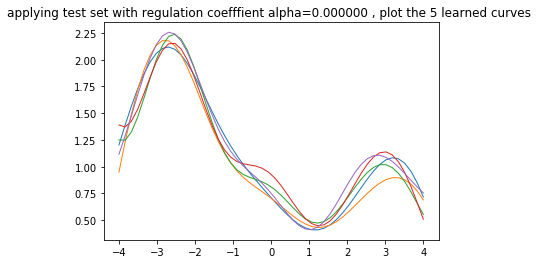

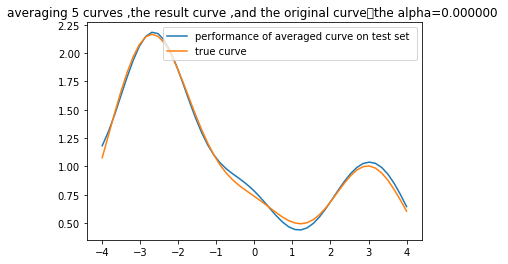

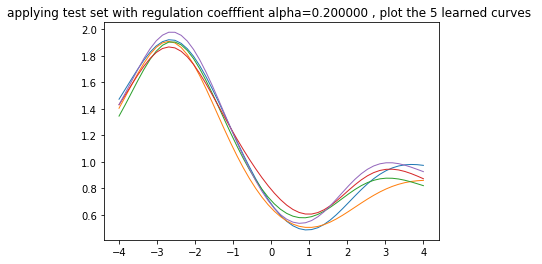

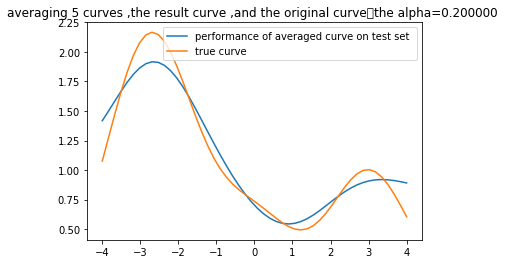

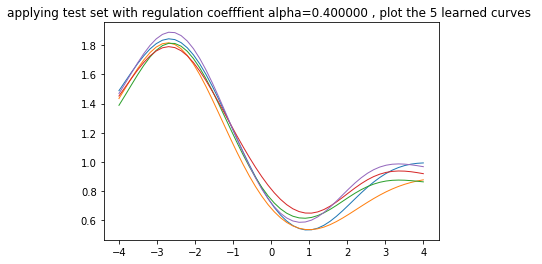

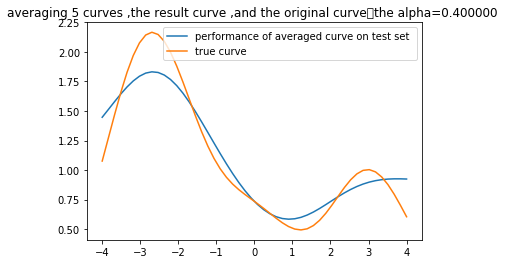

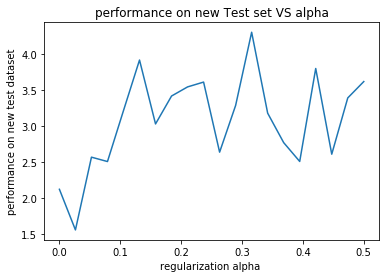

In [6]:
dataSet=[]
setSize=20
numLine=5


for i in range(setSize):
    dataSet=dataSet+[(C+np.random.normal(scale=noise_sd,size=C.size)).tolist()]

####################################
alpha=0
weightSet,predictSet=parameter(alpha,dataSet)    
plot(weightSet,predictSet)
######################################################
alpha=0.2
weightSet,predictSet=parameter(alpha,dataSet)    
plot(weightSet,predictSet)
######################################################
alpha=0.4
weightSet,predictSet=parameter(alpha,dataSet)    
plot(weightSet,predictSet)
#########################
A=np.linspace(0,0.5,20)
#A=np.array([0,0.2,100])
loss=[]
for a in A:
    w,p=parameter(a,dataSet)
    w_aver=np.sum(np.array(w),axis=0)/np.array(w).shape[0]
    pre=np.matmul(Basis,w_aver)
   # print(np.sum(np.array(p),axis=0)/(np.array(p).shape[0]))
     #print(np.sum((C-np.sum(p,axis=0)/np.array(p).shape[0])**2)*100/C.size)
    loss=loss+[np.sum((dataSet[np.random.randint(0,len(dataSet))]-pre)**2)]

#print(np.array(loss)<0)  

plt.figure()
plt.plot(A,loss)
plt.xlabel('regularization alpha ')
plt.ylabel('performance on new test dataset')
plt.title('performance on new Test set VS alpha')

# 3.3.1 parameter distribution

In [7]:
def getdata(X,DS,size=1):
    index=np.random.randint(0,np.array(DS).size,size)
    
    y=np.array(DS)[index]
    y=y.reshape(y.size,1)
    x=X[index]
    return [x,y]

(2,) [0, 0]


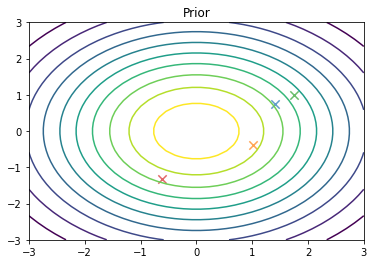

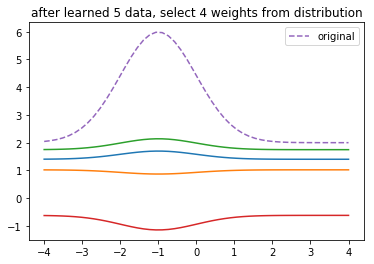

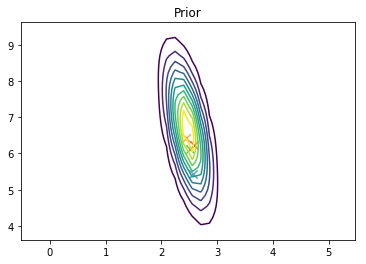

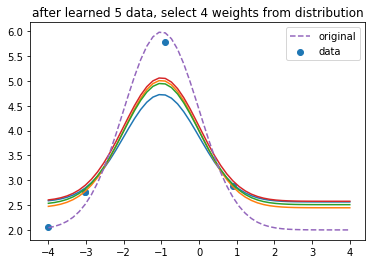

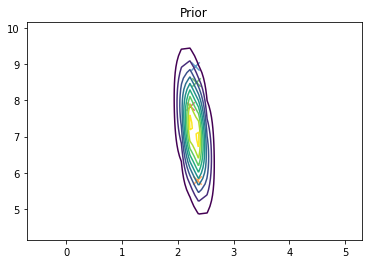

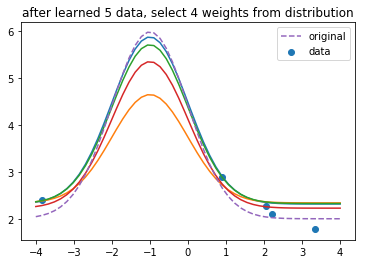

In [52]:
alpha=0.2
ranWS=4
X=np.linspace(-4,4,50)
noise_sd=0.2
mixWeight=[1]
mixMean=[-1]
ls=5
#u=np.linspace(-4,5,8)
u=np.array(mixMean)
Basis=np.array(np.concatenate((np.array([[1]]),GaussianBasis(X[0],u,d=u.size).reshape(u.size,1)),axis=0)).T
for h in X[1:]:
    Basis=np.concatenate((Basis,np.array(np.concatenate((np.array([[1]]),GaussianBasis(h,u,d=u.size).reshape(u.size,1)),axis=0)).T),axis=0)

C=mixtureGaussian(X,mixWeight,mixMean)+np.random.randint(-3,3)

T=C+np.random.normal(scale=noise_sd,size=C.size)
T=T.reshape(T.size,1)
#####
Mn=np.array([0,0]).reshape(2,)
Sn=np.identity(2)/alpha
lim=3
w0=np.linspace(Mn[0]-lim,Mn[0]+lim,40)
w1=np.linspace(Mn[1]-lim,Mn[1]+lim,40)
W0,W1=np.meshgrid(w0,w1)
Z=np.zeros((w0.size,w1.size))
########################

print(Mn.shape,Mn.T.tolist())#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
for x in range(w0.size):
    for y in range(w1.size):
        
        Z[y][x]=sc.multivariate_normal.pdf([w0[x],w1[y]],Mn.reshape(2,),Sn)
sample=[]

for i in range(ranWS):
    t=np.random.multivariate_normal(Mn,Sn,size=1)
    t=t.T
   
    while (np.absolute(t[0]-Mn[0])>=lim or  np.absolute(t[1]-Mn[1])>=lim):
        t=np.random.multivariate_normal([0,0],np.identity(2)/alpha,size=1)
        t=t.T
    sample=sample+[t]

plt.figure()
plt.title('Prior')
plt.contour(W0,W1,Z,10)
for w in sample:
    plt.scatter(w[0],w[1],alpha=0.7,s=70,edgecolor="steelblue",marker='x')
#ax.plot(X,predict+noise_sd,predict-noise_sd)
plt.figure()
plt.title('after learned %d data, select %d weights from distribution'%(ls,len(sample)))
for w in sample:
    p=np.matmul(Basis,w)
    plt.plot(X,p)
plt.plot(X,C,linestyle='--',label='original')
plt.legend()
################################


##################################

ds=T
x,y=getdata(X,ds,ls)
xs=x
ys=y
Basis2=np.array(np.concatenate((np.array([[1]]),GaussianBasis(x[0],u,d=u.size).reshape(u.size,1)),axis=0)).T
for h in x[1:]:
    Basis2=np.concatenate((Basis2,np.array(np.concatenate((np.array([[1]]),GaussianBasis(h,u,d=u.size).reshape(u.size,1)),axis=0)).T),axis=0)

S0inv=np.linalg.inv(Sn)
Sn=np.linalg.inv(S0inv+np.matmul(Basis2.T,Basis2)/noise_sd)
M0=Mn.reshape(2,1)
Mn=np.matmul(Sn,(np.matmul(S0inv,M0)+np.matmul(Basis2.T,y)/noise_sd))
w0=np.linspace(Mn[0]-lim,Mn[0]+lim,40)
w1=np.linspace(Mn[1]-lim,Mn[1]+lim,40)
W0,W1=np.meshgrid(w0,w1)
for x in range(w0.size):
    for y in range(w1.size):
      #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
        Z[y][x]=sc.multivariate_normal.pdf([w0[x],w1[y]],Mn.reshape(2,),Sn)
sample=[]

for i in range(ranWS):
    t=np.random.multivariate_normal(Mn.reshape(2,),Sn,size=1)
    t=t.T
   
    while (np.absolute(t[0]-Mn[0])>=lim or  np.absolute(t[1]-Mn[1])>=lim):
        t=np.random.multivariate_normal(Mn.reshape(2,),Sn,size=1)
        t=t.T
    sample=sample+[t]

plt.figure()
plt.title('Prior')
plt.contour(W0,W1,Z,10)
for w in sample:
    plt.scatter(w[0],w[1],alpha=0.7,s=70,edgecolor="steelblue",marker='x')
#ax.plot(X,predict+noise_sd,predict-noise_sd)
plt.figure()
plt.title('after learned %d data, select %d weights from distribution'%(ls,len(sample)))
for w in sample:
    p=np.matmul(Basis,w)
    plt.plot(X,p)
plt.plot(X,C,linestyle='--',label='original')
plt.scatter(xs,ys,label='data')
plt.legend()
#################################
ds=T
x,y=getdata(X,ds,ls)
xs=x
ys=y
Basis2=np.array(np.concatenate((np.array([[1]]),GaussianBasis(x[0],u,d=u.size).reshape(u.size,1)),axis=0)).T
for h in x[1:]:
    Basis2=np.concatenate((Basis2,np.array(np.concatenate((np.array([[1]]),GaussianBasis(h,u,d=u.size).reshape(u.size,1)),axis=0)).T),axis=0)

S0inv=np.linalg.inv(Sn)
Sn=np.linalg.inv(S0inv+np.matmul(Basis2.T,Basis2)/noise_sd)
M0=Mn
Mn=np.matmul(Sn,(np.matmul(S0inv,M0)+np.matmul(Basis2.T,y)/noise_sd))
w0=np.linspace(Mn[0]-lim,Mn[0]+lim,40)
w1=np.linspace(Mn[1]-lim,Mn[1]+lim,40)
W0,W1=np.meshgrid(w0,w1)
for x in range(w0.size):
    for y in range(w1.size):
        Z[y][x]=sc.multivariate_normal.pdf([w0[x],w1[y]],Mn.reshape(2,),Sn)
sample=[]

for i in range(ranWS):
    t=np.random.multivariate_normal(Mn.reshape(2,),Sn,size=1)
    t=t.T
  
    while (np.absolute(t[0]-Mn[0])>=lim or  np.absolute(t[1]-Mn[1])>=lim):
        t=np.random.multivariate_normal(Mn.reshape(2,),Sn,size=1)
        t=t.T
    sample=sample+[t]

plt.figure()
plt.title('Prior')
plt.contour(W0,W1,Z,10)
for w in sample:
    plt.scatter(w[0],w[1],alpha=0.7,s=70,edgecolor="steelblue",marker='x')
#ax.plot(X,predict+noise_sd,predict-noise_sd)
plt.figure()
plt.scatter(xs,ys,label='data')
plt.title('after learned %d data, select %d weights from distribution'%(ls,len(sample)))
for w in sample:
    p=np.matmul(Basis,w)
    plt.plot(X,p)
plt.plot(X,C,linestyle='--',label='original')
plt.legend()

# 3.3.2 prediction distribution

In [75]:
def variance(beta,basis,Sn):
    basis=basis.reshape(basis.size,1)
    return (1/beta+np.matmul(np.matmul(basis.T,Sn),basis))

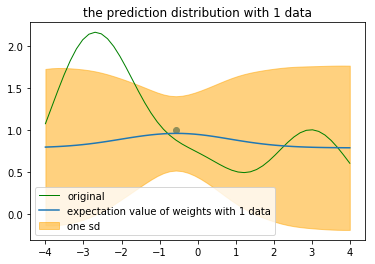

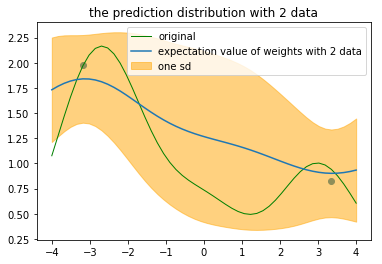

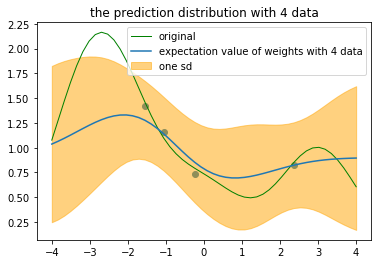

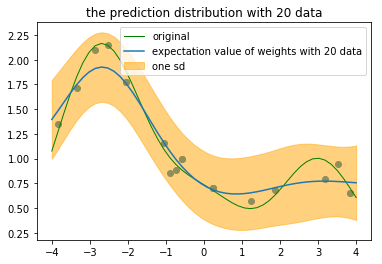

In [200]:
X=np.linspace(-4,4,50)
noise_sd=0.1
mixWeight=[0.2,0.25,0.4,0.15]
mixMean=[-2,3,-3,0]
u=np.linspace(-4,5,8)
alpha=2
ls=1
C=mixtureGaussian(X,mixWeight,mixMean)

T=C+np.random.normal(scale=noise_sd,size=C.size)
T=T.reshape(T.size,1)
#########################


plt.figure()
plt.title('the prediction distribution with %d data'%(ls))
ax=plt.gca()
plt.plot(X,C,linewidth=1,color='green',label='original')
Basis=np.array(np.concatenate((np.array([[1]]),GaussianBasis(X[0],u,d=u.size).reshape(u.size,1)),axis=0)).T
for x in X[1:]:
    Basis=np.concatenate((Basis,np.array(np.concatenate((np.array([[1]]),GaussianBasis(x,u,d=u.size).reshape(u.size,1)),axis=0)).T),axis=0)

x,y=getdata(X,T,ls)
Basis2=np.array(np.concatenate((np.array([[1]]),GaussianBasis(x[0],u,d=u.size).reshape(u.size,1)),axis=0)).T
for h in x[1:]:
    Basis2=np.concatenate((Basis2,np.array(np.concatenate((np.array([[1]]),GaussianBasis(h,u,d=u.size).reshape(u.size,1)),axis=0)).T),axis=0)


S0inv=np.linalg.inv(np.identity(Basis2.shape[1])*alpha)
Sn=np.linalg.inv(S0inv+np.matmul(Basis2.T,Basis2)/noise_sd)
M0=np.zeros((Basis2.shape[1],1))
Mn=np.matmul(Sn,(np.matmul(S0inv,M0)+np.matmul(Basis2.T,y)/noise_sd))
#############pause for variance writinSg!!!
Var=[variance(1/noise_sd,i,Sn)**0.5 for i in Basis]
pre=np.matmul(Basis,Mn)
plt.plot(X,pre,label='expectation value of weights with %d data'%(ls))
plt.scatter(x,y)

ax.fill_between(X,(pre.reshape(pre.size,)+np.array(Var).reshape(pre.size,)),(pre.reshape(pre.size,)-np.array(Var).reshape(pre.size,)), color="orange", alpha=0.5, label="one sd")
plt.legend()
##################################################
ls=2
plt.figure()
plt.title('the prediction distribution with %d data'%(ls))
ax=plt.gca()
plt.plot(X,C,linewidth=1,color='green',label='original')
Basis=np.array(np.concatenate((np.array([[1]]),GaussianBasis(X[0],u,d=u.size).reshape(u.size,1)),axis=0)).T
for x in X[1:]:
    Basis=np.concatenate((Basis,np.array(np.concatenate((np.array([[1]]),GaussianBasis(x,u,d=u.size).reshape(u.size,1)),axis=0)).T),axis=0)

x,y=getdata(X,T,ls)
Basis2=np.array(np.concatenate((np.array([[1]]),GaussianBasis(x[0],u,d=u.size).reshape(u.size,1)),axis=0)).T
for h in x[1:]:
    Basis2=np.concatenate((Basis2,np.array(np.concatenate((np.array([[1]]),GaussianBasis(h,u,d=u.size).reshape(u.size,1)),axis=0)).T),axis=0)


S0inv=np.linalg.inv(np.identity(Basis2.shape[1])*alpha)
Sn=np.linalg.inv(S0inv+np.matmul(Basis2.T,Basis2)/noise_sd)
M0=np.zeros((Basis2.shape[1],1))
Mn=np.matmul(Sn,(np.matmul(S0inv,M0)+np.matmul(Basis2.T,y)/noise_sd))
#############pause for variance writinSg!!!
Var=[variance(1/noise_sd,i,Sn)**0.5 for i in Basis]
pre=np.matmul(Basis,Mn)
plt.plot(X,pre,label='expectation value of weights with %d data'%(ls))
plt.scatter(x,y)

ax.fill_between(X,(pre.reshape(pre.size,)+np.array(Var).reshape(pre.size,)),(pre.reshape(pre.size,)-np.array(Var).reshape(pre.size,)), color="orange", alpha=0.5, label="one sd")
plt.legend()
#########################################
ls=4
plt.figure()
plt.title('the prediction distribution with %d data'%(ls))
ax=plt.gca()
plt.plot(X,C,linewidth=1,color='green',label='original')
Basis=np.array(np.concatenate((np.array([[1]]),GaussianBasis(X[0],u,d=u.size).reshape(u.size,1)),axis=0)).T
for x in X[1:]:
    Basis=np.concatenate((Basis,np.array(np.concatenate((np.array([[1]]),GaussianBasis(x,u,d=u.size).reshape(u.size,1)),axis=0)).T),axis=0)

x,y=getdata(X,T,ls)
Basis2=np.array(np.concatenate((np.array([[1]]),GaussianBasis(x[0],u,d=u.size).reshape(u.size,1)),axis=0)).T
for h in x[1:]:
    Basis2=np.concatenate((Basis2,np.array(np.concatenate((np.array([[1]]),GaussianBasis(h,u,d=u.size).reshape(u.size,1)),axis=0)).T),axis=0)


S0inv=np.linalg.inv(np.identity(Basis2.shape[1])*alpha)
Sn=np.linalg.inv(S0inv+np.matmul(Basis2.T,Basis2)/noise_sd)
M0=np.zeros((Basis2.shape[1],1))
Mn=np.matmul(Sn,(np.matmul(S0inv,M0)+np.matmul(Basis2.T,y)/noise_sd))
#############pause for variance writinSg!!!
Var=[variance(1/noise_sd,i,Sn)**0.5 for i in Basis]
pre=np.matmul(Basis,Mn)
plt.plot(X,pre,label='expectation value of weights with %d data'%(ls))
plt.scatter(x,y)

ax.fill_between(X,(pre.reshape(pre.size,)+np.array(Var).reshape(pre.size,)),(pre.reshape(pre.size,)-np.array(Var).reshape(pre.size,)), color="orange", alpha=0.5, label="one sd")
plt.legend()
#############################
ls=20
plt.figure()
plt.title('the prediction distribution with %d data'%(ls))
ax=plt.gca()
plt.plot(X,C,linewidth=1,color='green',label='original')
Basis=np.array(np.concatenate((np.array([[1]]),GaussianBasis(X[0],u,d=u.size).reshape(u.size,1)),axis=0)).T
for x in X[1:]:
    Basis=np.concatenate((Basis,np.array(np.concatenate((np.array([[1]]),GaussianBasis(x,u,d=u.size).reshape(u.size,1)),axis=0)).T),axis=0)

x,y=getdata(X,T,ls)
Basis2=np.array(np.concatenate((np.array([[1]]),GaussianBasis(x[0],u,d=u.size).reshape(u.size,1)),axis=0)).T
for h in x[1:]:
    Basis2=np.concatenate((Basis2,np.array(np.concatenate((np.array([[1]]),GaussianBasis(h,u,d=u.size).reshape(u.size,1)),axis=0)).T),axis=0)


S0inv=np.linalg.inv(np.identity(Basis2.shape[1])*alpha)
Sn=np.linalg.inv(S0inv+np.matmul(Basis2.T,Basis2)/noise_sd)
M0=np.zeros((Basis2.shape[1],1))
Mn=np.matmul(Sn,(np.matmul(S0inv,M0)+np.matmul(Basis2.T,y)/noise_sd))
#############pause for variance writinSg!!!
Var=[variance(1/noise_sd,i,Sn)**0.5 for i in Basis]
pre=np.matmul(Basis,Mn)
plt.plot(X,pre,label='expectation value of weights with %d data'%(ls))
plt.scatter(x,y)

ax.fill_between(X,(pre.reshape(pre.size,)+np.array(Var).reshape(pre.size,)),(pre.reshape(pre.size,)-np.array(Var).reshape(pre.size,)), color="orange", alpha=0.5, label="one sd")
plt.legend()

In [ ]:
sc.multivariate_normal.pdf([1,5],Mn,Sn)